In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np

# Carregando o dataset bruto
df = pd.read_csv('../data/ifood-restaurants-february-2021.csv')

# Visão geral dos dados
print(df.shape)
print(df.info())
df.describe(include='all')
df.head()

(406399, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   avatar                  406122 non-null  object 
 2   category                406399 non-null  object 
 3   delivery_fee            406399 non-null  float64
 4   delivery_time           406399 non-null  int64  
 5   distance                406399 non-null  float64
 6   ibge                    406399 non-null  int64  
 7   minimumOrderValue       406399 non-null  float64
 8   name                    406399 non-null  object 
 9   paymentCodes            406397 non-null  object 
 10  price_range             406399 non-null  object 
 11  rating                  406399 non-null  float64
 12  tags                    406399 non-null  object 
 13  url                     406399 non-null  object 
dtypes: bool

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,Toma na Kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,Churrasquinho do Barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,Prime Restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...


In [2]:
# Verificando valores ausentes
df.isnull().sum().sort_values(ascending=False)

avatar                    277
paymentCodes                2
availableForScheduling      0
category                    0
delivery_fee                0
delivery_time               0
distance                    0
ibge                        0
minimumOrderValue           0
name                        0
price_range                 0
rating                      0
tags                        0
url                         0
dtype: int64

In [3]:
# Tratando valores nulos (coluna avatar) 
# Preencher com uma string padrão como "sem_avatar"
df['avatar'] = df['avatar'].fillna('sem_avatar')

# Preencher com "desconhecido" (para manter a linha)
df['paymentCodes'] = df['paymentCodes'].fillna('desconhecido')

In [4]:
# Conferindo se o tratamento funcionou
df.isnull().sum()

availableForScheduling    0
avatar                    0
category                  0
delivery_fee              0
delivery_time             0
distance                  0
ibge                      0
minimumOrderValue         0
name                      0
paymentCodes              0
price_range               0
rating                    0
tags                      0
url                       0
dtype: int64

In [5]:
# Verificando duplicatas
df.duplicated().sum()

0

In [6]:
# Removendo duplicatas
df.drop_duplicates(inplace=True)

In [7]:
df.columns

Index(['availableForScheduling', 'avatar', 'category', 'delivery_fee',
       'delivery_time', 'distance', 'ibge', 'minimumOrderValue', 'name',
       'paymentCodes', 'price_range', 'rating', 'tags', 'url'],
      dtype='object')

In [8]:
df['minimumOrderValue'].head()
print(df['minimumOrderValue'].dtype)

float64


In [9]:
#A saída do df.dtypes mostra que seus dados estão bem organizados
df.dtypes

availableForScheduling       bool
avatar                     object
category                   object
delivery_fee              float64
delivery_time               int64
distance                  float64
ibge                        int64
minimumOrderValue         float64
name                       object
paymentCodes               object
price_range                object
rating                    float64
tags                       object
url                        object
dtype: object

In [10]:
# Removendo espaços e padronizando texto em colunas categóricas
df['category'] = df['category'].str.strip().str.lower()
df['price_range'] = df['price_range'].str.strip().str.lower()

# Tratamento seguro para a coluna tags
df['tags'] = df['tags'].fillna('').astype(str).str.lower().str.split(',').apply(
    lambda x: [tag.strip() for tag in x]
)

# Limpando e transformando paymentCodes em listas reais
df['paymentCodes'] = df['paymentCodes'].fillna('').apply(
    lambda x: [code.strip() for code in x.split('$$')] if x else []
)

# Colunas irrelevantes que podem ser descartadas
df.drop(columns=['avatar', 'url'], inplace=True)

In [11]:
df.head()

,availableForScheduling,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags
0,False,marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,"[DNR, MPAY, MOVPAY_MC, MC, GPY_ELO, ELOD, GPY_...",cheapest,0.0,[address_preform_type $$ cart::mcht::100_deliv...
1,False,açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,"[DNR, MPAY, MOVPAY_MC, MC, GPY_ELO, ELOD, GPY_...",cheapest,0.0,[address_preform_type $$ guided_help_type $$ m...
2,False,bebidas,11.99,70,8.35,5300108,5.0,Toma na Kombi,"[DNR, MPAY, MOVPAY_MC, MC, GPY_ELO, RDREST, EL...",moderate,0.0,[address_preform_type $$ cpgn_user_discount_6_...
3,False,carnes,16.49,63,6.35,5300108,20.0,Churrasquinho do Barriga´s,"[DNR, MPAY, MOVPAY_MC, MC, GPY_ELO, ELOD, GPY_...",cheapest,0.0,[address_preform_type $$ guided_help_type $$ n...
4,False,brasileira,11.99,58,5.22,5300108,20.0,Prime Restaurante,"[DNR, MPAY, MOVPAY_MC, MC, GPY_ELO, ELOD, GPY_...",cheapest,0.0,[address_preform_type $$ guided_help_type $$ n...


In [12]:
# Colunas de texto que desejamos limpar
colunas_texto = ['name', 'category', 'subcategories', 'city', 'state']

# Aplicando apenas se a coluna existir
for col in colunas_texto:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

In [13]:
print(df.columns)
print(df.dtypes)

Index(['availableForScheduling', 'category', 'delivery_fee', 'delivery_time',
       'distance', 'ibge', 'minimumOrderValue', 'name', 'paymentCodes',
       'price_range', 'rating', 'tags'],
      dtype='object')
availableForScheduling       bool
category                   object
delivery_fee              float64
delivery_time               int64
distance                  float64
ibge                        int64
minimumOrderValue         float64
name                       object
paymentCodes               object
price_range                object
rating                    float64
tags                       object
dtype: object


In [14]:
print(df.isnull().sum())

availableForScheduling    0
category                  0
delivery_fee              0
delivery_time             0
distance                  0
ibge                      0
minimumOrderValue         0
name                      0
paymentCodes              0
price_range               0
rating                    0
tags                      0
dtype: int64


In [15]:
import ast

def para_lista(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df['paymentCodes'] = df['paymentCodes'].apply(para_lista)

In [16]:
df['price_range'] = df['price_range'].str.lower().str.strip()
df['price_range'] = df['price_range'].replace({'$$$': 'alto', '$$': 'medio', '$': 'baixo'})

In [17]:
# delivery_time
q1 = df['delivery_time'].quantile(0.25)
q3 = df['delivery_time'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

df = df[df['delivery_time'] <= limite_superior]

In [18]:
# distance
q1 = df['distance'].quantile(0.25)
q3 = df['distance'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

df = df[df['distance'] <= limite_superior]

In [19]:
# minimumOrderValue
q1 = df['minimumOrderValue'].quantile(0.25)
q3 = df['minimumOrderValue'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

df = df[df['minimumOrderValue'] <= limite_superior]

In [20]:
df.to_csv('dados_ifood_limpos.csv', index=False)

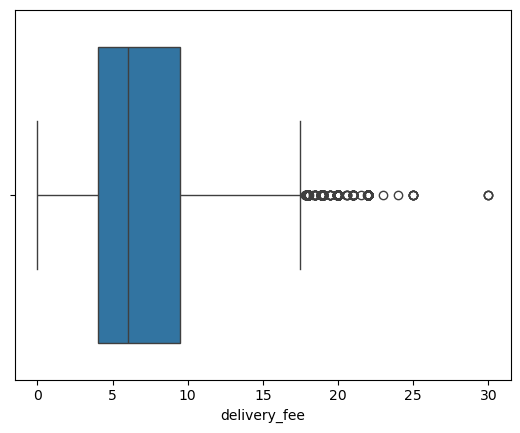

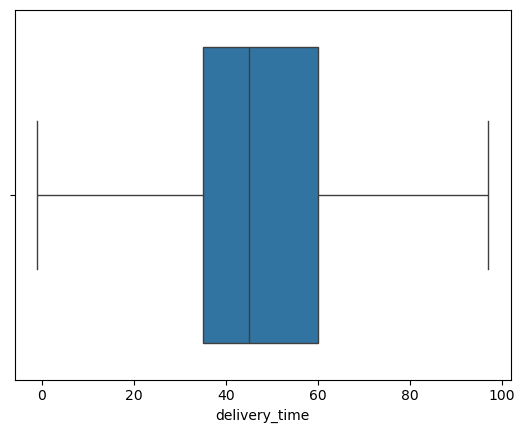

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['delivery_fee'])
plt.show()

sns.boxplot(x=df['delivery_time'])
plt.show()

In [22]:
#O que o código faz:
#Define um conjunto de colunas numéricas que fazem sentido para verificar outliers.
#Para cada coluna, calcula o limite inferior e superior pelo método clássico do IQR (1.5x).
#Filtra o dataframe para manter apenas os dados dentro desses limites.
#Imprime quantos registros foram removidos para cada coluna.
#No final, mostra quantos registros sobraram após a limpeza.
    
# Lista das colunas numéricas para aplicar o filtro de outliers
colunas_numericas = ['delivery_fee', 'delivery_time', 'distance', 'minimumOrderValue', 'rating']

# Função para calcular limites inferior e superior pelo método IQR com multiplicador 1.5
def calcula_limites_iqr(df, coluna, multiplier=1.5):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - multiplier * IQR
    limite_superior = Q3 + multiplier * IQR
    return limite_inferior, limite_superior

# Copia do dataframe original para não perder dados originais
df_limpo = df.copy()

for col in colunas_numericas:
    li, ls = calcula_limites_iqr(df_limpo, col)
    print(f"Filtrando valores em '{col}' fora dos limites [{li}, {ls}]")
    antes = df_limpo.shape[0]
    # Mantém apenas os dados dentro dos limites calculados (remove outliers)
    df_limpo = df_limpo[(df_limpo[col] >= li) & (df_limpo[col] <= ls)]
    depois = df_limpo.shape[0]
    print(f"Registros antes: {antes} | Registros depois: {depois}")
    print(f"Removidos: {antes - depois}\n")

print(f"Total de registros após limpeza: {df_limpo.shape[0]}")

Filtrando valores em 'delivery_fee' fora dos limites [-4.234999999999999, 17.725]
Registros antes: 392879 | Registros depois: 391629
Removidos: 1250

Filtrando valores em 'delivery_time' fora dos limites [-2.5, 97.5]
Registros antes: 391629 | Registros depois: 391629
Removidos: 0

Filtrando valores em 'distance' fora dos limites [-2.7850000000000006, 9.255]
Registros antes: 391629 | Registros depois: 391404
Removidos: 225

Filtrando valores em 'minimumOrderValue' fora dos limites [-5.0, 35.0]
Registros antes: 391404 | Registros depois: 391404
Removidos: 0

Filtrando valores em 'rating' fora dos limites [-7.078125, 11.796875]
Registros antes: 391404 | Registros depois: 391404
Removidos: 0

Total de registros após limpeza: 391404


In [24]:
# Salvar o dataframe limpo em um arquivo CSV
df.to_csv('../data/ifood_data_limpo.csv', index=False)
print("Arquivo salvo como 'ifood_data_limpo.csv'")

Arquivo salvo como 'ifood_data_limpo.csv'
